# Appendix A1: Results and Findings
>Below is the content converted to pdf format from ipynb file

# Bank Marketing

### Abstract
This is dataset that describe Portugal bank marketing campaigns results. 
Conducted campaigns were based mostly on direct phone calls, offering  bank's clients to place a term deposit. 
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

## Problem Statement
There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

## About Dataset 
It is a dataset that describing Portugal bank marketing campaigns results.Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Source of the data:
https://archive.ics.uci.edu/ml/datasets/bank+marketing
<a id="subsection-two"></a>
# About Project
In this project, I will analyze the Bank lead's dataset and create a classification algorithm with full end feature engineering and EDA



In [118]:
# Importing required libraries.
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [119]:
# Bank_data is Dataframe here
# Loading csv file into bank_data
bank_data = pd.read_csv('../input/bank-marketing/bank-additional-full.csv',sep = ';')
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [120]:
print('Data columns with null values:',bank_data.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


we don't have any null values.

 ## Input variables:
 
   #### Bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   * 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   * 5 - default: has credit in default? (categorical: "no","yes","unknown")
   * 6 - housing: has housing loan? (categorical: "no","yes","unknown")
   * 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### Related with the last contact of the current campaign:
   * 8 - contact: contact communication type (categorical: "cellular","telephone") 
   * 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   * 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### Other attributes:
   * 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   * 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   * 14 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### Social and economic context attributes
   * 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   * 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
   * 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   * 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
   * 20 - nr.employed: number of employees - quarterly indicator (numeric)

   #### Output variable (desired target):
   * 21 - y - has the client subscribed a term deposit? (binary: "yes","no")
   
   #### Sources:
   http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

## Dataset Analysis

In [121]:
# Number of rows and columns
bank_data.shape

(41188, 21)

In [122]:
# Information about the columns
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [123]:
# Information about types of the attributes
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Description contains the information for each column:
If the DataFrame contains numerical data, the description contains these information for each column:
   * count - The number of not-empty values.
   * mean - The average (mean) value.
   * std - The standard deviation.
   * min - the minimum value.
   * 25% - The 25% percentile*.
   * 50% - The 50% percentile*.
   * 75% - The 75% percentile*.
   * max - the maximum value.

In [124]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [125]:
bank_client_data = bank_data.iloc[: , 0:11]
bank_client_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307


#### Bank client data Analysis and Categorical Treatment
* Working with the atributes related to bank clients.

In [126]:
# knowing the categorical variables
print('\nJobs:\n\n', bank_client_data['job'].unique())
print('\nMarital:\n\n', bank_client_data['marital'].unique())
print('\nEducation:\n\n', bank_client_data['education'].unique())
print('\nDefault:\n\n', bank_client_data['default'].unique())
print('\nHousing:\n\n', bank_client_data['housing'].unique())
print('\nLoan:\n\n', bank_client_data['loan'].unique())
print("\nContact Type: \n\n", bank_client_data['contact'].unique())
print("\nWorking month: \n\n", bank_client_data['month'].unique())
print("\nWorking days of week: \n\n", bank_client_data['day_of_week'].unique())


Jobs:

 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Marital:

 ['married' 'single' 'divorced' 'unknown']

Education:

 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:

 ['no' 'unknown' 'yes']

Housing:

 ['no' 'yes' 'unknown']

Loan:

 ['no' 'yes' 'unknown']

Contact Type: 

 ['telephone' 'cellular']

Working month: 

 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Working days of week: 

 ['mon' 'tue' 'wed' 'thu' 'fri']


#### Age
Trying to find some insights crossing those variables

In [127]:
#Trying to find some strange values or null values
print('Minimum age: ', bank_client_data['age'].max())
print('Maximum age: ', bank_client_data['age'].min())
print('Null Values: ', bank_client_data['age'].isnull().any())

Minimum age:  98
Maximum age:  17
Null Values:  False


#### JOBS

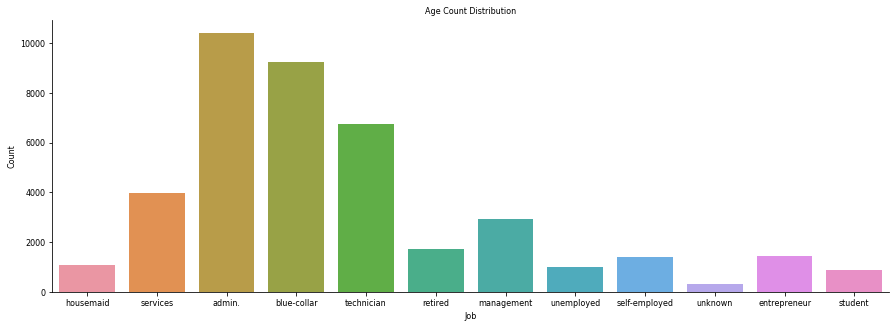

In [128]:
# What kind of jobs clients this bank have, crossing jobs with default, loan or housing, there is no relation.
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job', data = bank_client_data)
ax.set_xlabel('Job', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
ax.set_title('Age Count Distribution', fontsize=8)
ax.tick_params(labelsize=8)
sns.despine()

#### Call Duration

In [129]:
print("Max duration call in minutes: ", round((bank_client_data['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_client_data['duration'].min()/60),1))

Max duration call in minutes:  82.0
Min duration  call in minutes:    0.0


## Duplicated Values

In [130]:
# Removing Duplicate Values
print(bank_data.duplicated())
print(bank_data.duplicated().sum()) # 12 duplicate values 
bank_data = bank_data.drop_duplicates() # Values have been removed

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool
12


## Hidden Missing Values

In [131]:
# Checking for null values
bank_data.isnull().values.any()

False

#### Missing Value
* As stated in the description of the variables above, there are several missing values in some $categorical$ attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [132]:
print("# Missing job: {0}".format(len(bank_data.loc[bank_data['job'] == "unknown"])))
print("# Missing marital: {0}".format(len(bank_data.loc[bank_data['marital'] == "unknown"])))
print("# Missing education: {0}".format(len(bank_data.loc[bank_data['education'] == "unknown"])))
print("# Missing default: {0}".format(len(bank_data.loc[bank_data['default'] == "unknown"])))
print("# Missing housing:: {0}".format(len(bank_data.loc[bank_data['housing'] == "unknown"])))
print("# Missing loan: {0}".format(len(bank_data.loc[bank_data['loan'] == "unknown"])))
print("# Missing contact: {0}".format(len(bank_data.loc[bank_data['contact'] == "unknown"])))
print("# Missing month: {0}".format(len(bank_data.loc[bank_data['month'] == "unknown"])))
print("# Missing day_of_week: {0}".format(len(bank_data.loc[bank_data['day_of_week'] == "unknown"])))
print("# Missing poutcome: {0}".format(len(bank_data.loc[bank_data['poutcome'] == "unknown"])))

# Missing job: 330
# Missing marital: 80
# Missing education: 1730
# Missing default: 8596
# Missing housing:: 990
# Missing loan: 990
# Missing contact: 0
# Missing month: 0
# Missing day_of_week: 0
# Missing poutcome: 0


## Outliers Analysis

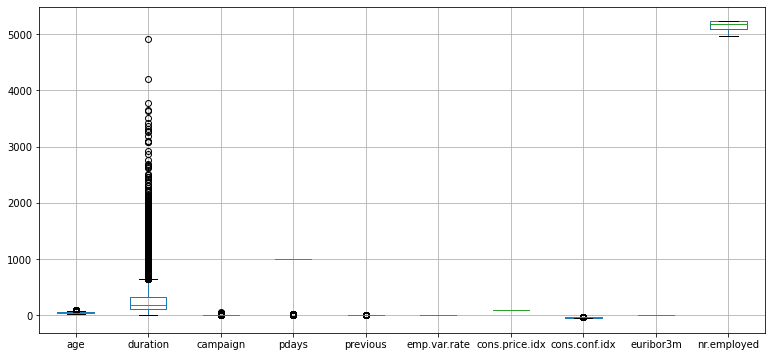

In [133]:
# Outliers are mainly found in duration. Changes will need to be made.

plt.figure(figsize=(13,6))
bank_data.boxplot()
print()

### Removing Outliers in 'duration' using IQR method.
* Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph. 
* Outliers increase the variability in your data, which decreases statistical power. 
* Consequently, excluding outliers can cause your results to become statistically significant.
* It increases the error variance and reduces the power of statistical tests. 
* They can cause bias and/or influence estimates. 
* They can also impact the basic assumption of regression as well as other statistical models

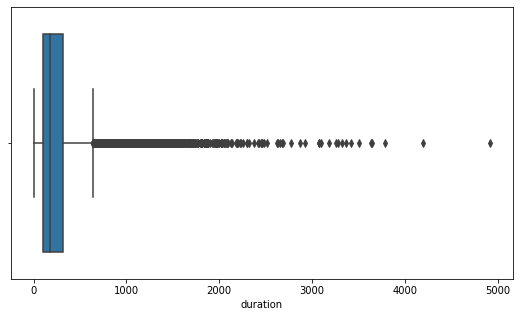

In [134]:
plt.figure(figsize=(9, 5))
sns.boxplot(x=bank_data['duration'])
plt.show()

In [135]:
print(bank_data['duration'])

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41176, dtype: int64


### IQR
Interquartile Range, or IQR for short.
The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [136]:
Q1 = bank_data['duration'].quantile(.25)
Q3 = bank_data['duration'].quantile(.75)

Q1,Q3

(102.0, 319.0)

In [137]:
IQR = Q3 - Q1
IQR

217.0

### Calculating the outliers:
* Interquartile range, IQR = Q3 - Q1
* lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
* Upper 1.5*IQR whisker = Q3 + 1.5 * IQR


In [138]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower,upper

(-223.5, 644.5)

#### Defining lower / upper

In [139]:
bank_data = bank_data[bank_data['duration'] >= lower] 
bank_data = bank_data[bank_data['duration'] <= upper]

In [140]:
print(bank_data['duration'])

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 38213, dtype: int64


In [141]:
# There were 41188 lines. Now, we have 38213 lines.
bank_data.shape

(38213, 21)

In [142]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000
mean,40.049250,203.270746,2.575720,963.320415,0.173239,0.081846,93.574332,-40.480967,3.622748,5167.128906
std,10.424753,141.025687,2.810393,184.821857,0.494584,1.571702,0.579752,4.631815,1.733697,72.080748
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,97.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,167.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,277.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,644.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


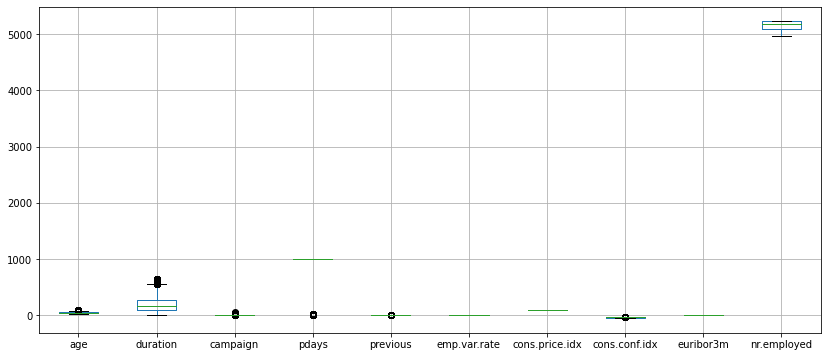

In [143]:
plt.figure(figsize=(14,6))
bank_data.boxplot()
print()

In [144]:
print("Max duration  call in minutes:  ", round((bank_client_data['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_client_data['duration'].min()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0


In [145]:
# If the call duration is equal to 0, then is obviously that this person didn't subscribed, 
# This lines need to be deleted.
bank_client_data[(bank_client_data['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0


## Correlations
Calculating the relationship between each column in data set.


In [146]:
# Term Deposit Subscription (Target). Tranforming Yes = 1 / No = 0
bank_data['y'] = 1 * (bank_data['y']== 'yes')

The result of correlations varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

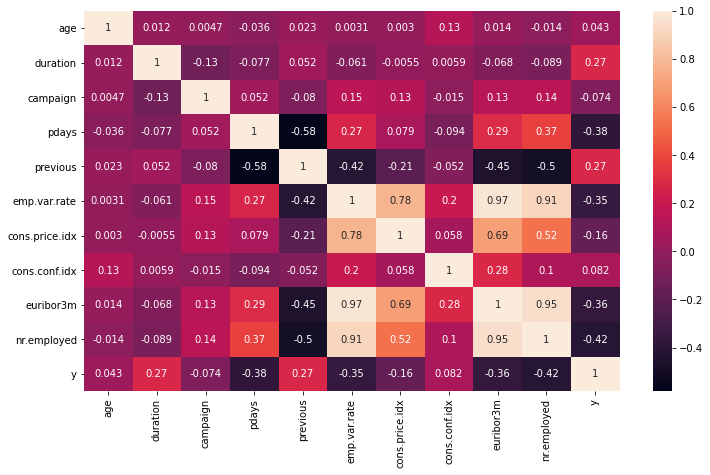

In [147]:
# Correlation between columns

plt.figure(figsize=(12,7))
correlacao = bank_data.corr()
sns.heatmap(correlacao, annot = True);

In [148]:
# Analyzing the correlations between numeric columns with the target variable (y)

bank_data.corr()['y'].drop('y').sort_values()

nr.employed      -0.418449
pdays            -0.381017
euribor3m        -0.360156
emp.var.rate     -0.353347
cons.price.idx   -0.163782
campaign         -0.073773
age               0.043468
cons.conf.idx     0.081780
duration          0.271775
previous          0.272292
Name: y, dtype: float64

## Data Balancing

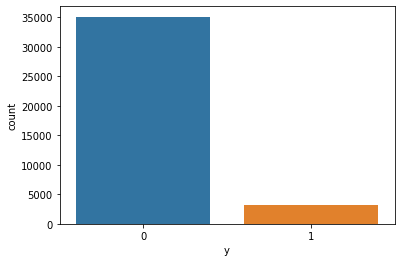

In [149]:
#Target distribution

sns.countplot(bank_data['y']);

In [150]:
bank_data_classe_majority = bank_data[bank_data.y==0]
bank_data_classe_minority = bank_data[bank_data.y==1]

In [151]:
bank_data_classe_majority.shape

(35100, 21)

In [152]:
bank_data_classe_minority.shape

(3113, 21)

In [153]:
# Upsample of minority class
from sklearn.utils import resample
bank_data_classe_minority_upsampled = resample(bank_data_classe_minority, 
                                           replace = True,     
                                           n_samples = 35100,   
                                           random_state = 150) 

In [154]:
bank_data_balanced_data = pd.concat([bank_data_classe_majority, bank_data_classe_minority_upsampled])

In [155]:
bank_data_balanced_data.y.value_counts()

0    35100
1    35100
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

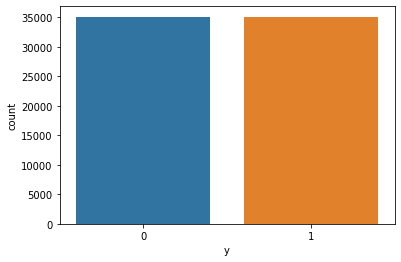

In [156]:
sns.countplot(bank_data_balanced_data['y'])

Balanced data. Saving the dataset with the manipulated data.

In [157]:
bank_data_balanced_data.to_csv('bank_data_modified_file.csv', encoding = 'utf-8', index = False) #bank_data2

In [158]:
df2 = pd.read_csv('bank_data_modified_file.csv')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### EDA

> For those who made term deposits (1), the average time was 331.72 seconds. For those who did not make a term deposit (0), the average time was 191.86 seconds. It means that, for a customer to make a term deposit, more time is needed to convince him/her.

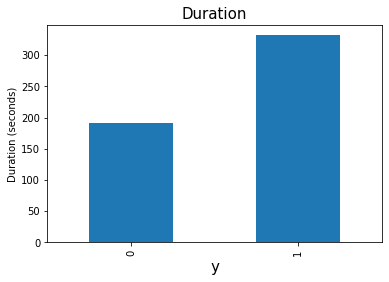

y
0    191.856724
1    331.720085
Name: duration, dtype: float64


In [159]:
time = df2.groupby('y').duration.mean()
time.plot.bar()
plt.title('Duration', fontsize = 15)
plt.xlabel('y', fontsize = 15)
plt.ylabel('Duration (seconds)')
plt.show()

print(time)


> May is the month when most customers make a term deposit

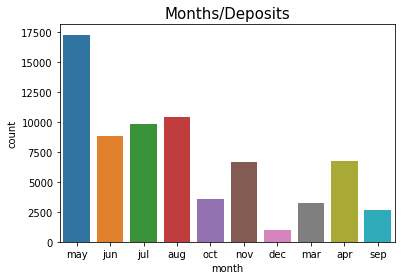

In [160]:
plt.title('Months/Deposits', fontsize = 15)
sns.countplot(df2['month'])
plt.show()


> The main form of contact is the cellular. Few customers who made term bank deposits were contacted by telephone.

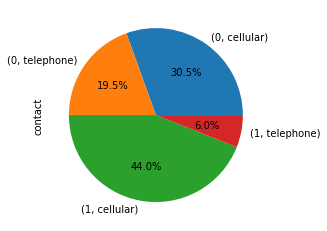

In [161]:
df2.groupby('y').contact.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


> Admin job is most common among those who made bank deposits.

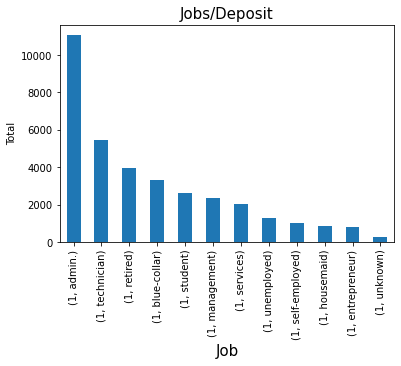

In [162]:
jobs = df2[df2['y'] == 1].groupby('y').job.value_counts()
jobs.plot.bar()

plt.title('Jobs/Deposit', fontsize = 15)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Total')

plt.show()


> Age Distribution of Customers was between 25 and 42 years old.

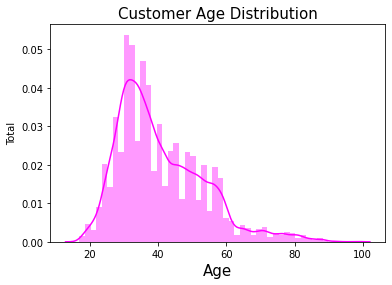

In [163]:
sns.distplot(df2['age'], color = 'magenta')
plt.title('Customer Age Distribution', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Total')
plt.show()

#### Turning Some Categorical Attributes to Numeric
>Machine learning models require some input and output variables to be numeric.
>This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['contact','month','day_of_week','poutcome']
for i in cat_var:
    df2[i]= le.fit_transform(df2[i]) 

df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Checking again for missing values
> We didn't generate missing values by accident, fortunately

In [165]:
df2.isnull().values.any()

False

In [166]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Train_test_split (Training and Testing data)

In [167]:
from sklearn.model_selection import train_test_split

X = df2[['contact','month','day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']] # Only numeric values

y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [168]:
X.shape, y.shape

((70200, 13), (70200,))

In [169]:
# Printing the results

print("{0:0.2f}% training data".format((len(X_train)/len(df2.index)) * 100))
print("{0:0.2f}% test data".format((len(X_test)/len(df2.index)) * 100))

70.00% training data
30.00% test data


## Developing and training the model

In [170]:
# Model evaluation metrics

from sklearn import metrics

### Baseline - Basic cutoff point for predicting values

In [171]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy="stratified") #stratified: generates predictions by respecting the training sets class distribution.
baseline.fit(X_train, y_train.ravel())

DummyClassifier(strategy='stratified')

In [172]:
accuracy_bl = baseline.score(X_train, y_train.ravel())
print("Accuracy: {0:.4f}".format(accuracy_bl))
print()

Accuracy: 0.5023




A **confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 
>There are 10576 true positives, clients who subscribed the term were correctly classified and 9000 true negatives clients without term subscribed were correctly classified. 
>However the algorithm misclassified 631 patients that did actually subscribed term by saying that they did not. Its a false negative. 

**F1 score**
>An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0

**Classification Report**
To get even more insight into model performance, we should examine other metrics like precision, recall, and F1 score.

1.	**Precision** is the number of correctly-identified members of a class divided by all the times the model predicted that class. 
2.	**Recall** is the number of members of a class that the classifier identified correctly divided by the total number of members in that class. 
3.	**F1 score** is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is a quick way to tell whether the classifier is actually good at identifying members of a class, or if it is finding shortcuts (e.g., just identifying everything as a member of a large class).

### Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train.ravel())

rfc_predict_test = rfc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rfc_predict_test, labels = [1, 0])))
print("")

accuracy_rfc = metrics.accuracy_score(y_test, rfc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_rfc))
print()

#Let’s use Scikit-Learn’s classification_report() to view these metrics for our model. I recommend wrapping it in a print() so that it will be nicely formatted.

print("Classification Report")
print(metrics.classification_report(y_test, rfc_predict_test, labels = [1, 0]))

Confusion Matrix
[[10570     0]
 [  631  9859]]

Accuracy: 0.9700

Classification Report
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     10570
           0       1.00      0.94      0.97     10490

    accuracy                           0.97     21060
   macro avg       0.97      0.97      0.97     21060
weighted avg       0.97      0.97      0.97     21060



### Decision Tree Classifier

In [174]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train.ravel())

dtc_predict_test = dtc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, dtc_predict_test, labels = [1, 0])))
print("")

accuracy_dtc = metrics.accuracy_score(y_test, dtc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, dtc_predict_test, labels = [1, 0]))

Confusion Matrix
[[10568     2]
 [  626  9864]]

Accuracy: 0.9702

Classification Report
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     10570
           0       1.00      0.94      0.97     10490

    accuracy                           0.97     21060
   macro avg       0.97      0.97      0.97     21060
weighted avg       0.97      0.97      0.97     21060



### Decision Tree Classifier

In [175]:
# Table summary for better viewing

results = pd.DataFrame([
    {'Algorithm' : 'Random Forest', 'Accuracy' : accuracy_rfc*100},
    {'Algorithm' : 'Decision Tree', 'Accuracy' : accuracy_dtc*100},

])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
1,Decision Tree,97.018044
0,Random Forest,97.003799


## Conclusion

After performing the required actions on the dataset we tried to perform EDA to get the insight of the data. 
1.	Decision Tree was the model that achieved the best accuracy, with 97.01%.;
2.	We can predict whether or not the customer will subscribe a term deposit, considering all the necessary variables for the classification test.
3.	The model shows that students and senior citizens respond better to proposal.
4.	Considering the factor of time, May is the most effective month. Bank should start approaching the clients during the start of new bank period (May-July) and it will be a good choice as many have shown positive results from data history.
5.	From the Exploratory Data Analysis, we can clearly identify that duration plays an important role in defining the outcome of our dataset When the call time is from 3 to 20 minutes and the number of times is less than 5, almost 100% of customers will agree to deposit with term.
6.	For those who made term deposits, the average time was 331 seconds. And for those who did not make a term deposit (0), the average time was 191 seconds. So more time is needed to convince the customer for term deposit. The longer the conversations on the phone, the higher interest the customer.
7.	Employment variation rate has negative influence, which means the change of the employment rate will make customers less likely to subscribe a term deposit.
